<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             41188 non-null  int64  
 1   Job             41188 non-null  object 
 2   Marital         41188 non-null  object 
 3   Education       41188 non-null  object 
 4   Default         41188 non-null  object 
 5   Housing         41188 non-null  object 
 6   Loan            41188 non-null  object 
 7   Contact         41188 non-null  object 
 8   Month           41188 non-null  object 
 9   Day_of_week     41188 non-null  object 
 10  Duration        41188 non-null  int64  
 11  Campaign        41188 non-null  int64  
 12  Pdays           41188 non-null  int64  
 13  Previous        41188 non-null  int64  
 14  Poutcome        41188 non-null  object 
 15  Emp.var.rate    41188 non-null  float64
 16  Cons.price.idx  41188 non-null  float64
 17  Cons.conf.idx   41188 non-null 

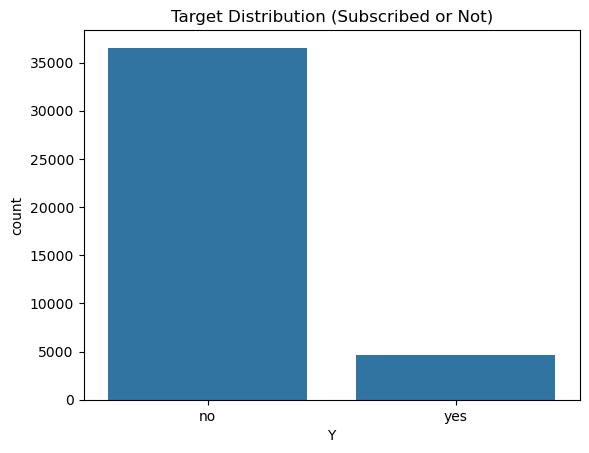

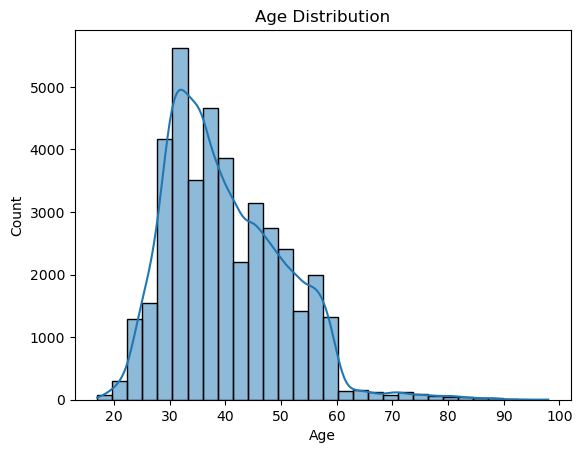

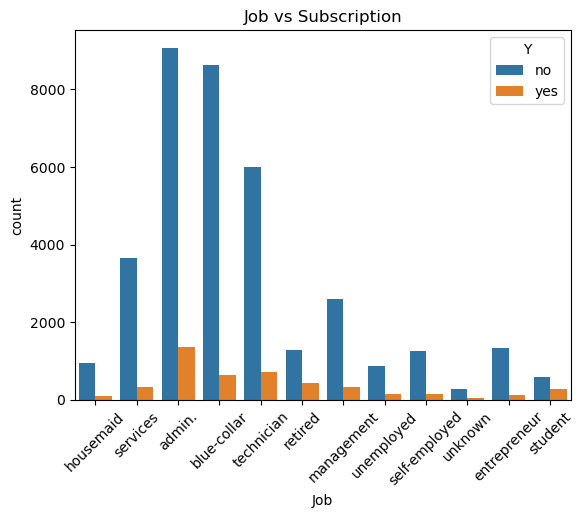

Accuracy: 0.9115076474872542
[[7103  200]
 [ 529  406]]
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      7303
        True       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



In [25]:
#BANK_MARKETING
#Import the data

import pandas as pd  # Change to pd from py
import numpy as np

df = pd.read_csv(r"D:\INTERNSHIP\SKILLFIED\BANK_MARKETING\DATASET\BANK_MARKETING_DATASET.csv")
df.head()

df.info()
df.describe()
df.isnull().sum()

#Explore the data

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Y', data=df)
plt.title("Target Distribution (Subscribed or Not)")
plt.show()

sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

sns.countplot(x='Job', hue='Y', data=df)
plt.xticks(rotation=45)
plt.title("Job vs Subscription")
plt.show()

#Data preprocessing

df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('Y_yes', axis=1)  
y = df_encoded['Y_yes']               
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling: Add StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale the training data
X_test_scaled = scaler.transform(X_test)  # Scale the test data using the same scaler

#Train a model

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
model = LogisticRegression(max_iter=2000)  # Increase iterations if necessary
model.fit(X_train_scaled, y_train)

#Evaluate the model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)  # Predict using scaled test data

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
